### USE CYTO_PY37 ENVIRONMENT

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from framework.Functions import *

In [4]:
import pytlsd

In [5]:
help(pytlsd)

Help on module pytlsd:

NAME
    pytlsd

DESCRIPTION
    Python transparent bindings for LSD (Line Segment Detector)
    -----------------------
    
    .. currentmodule:: pytlsd
    
    .. autosummary::
       :toctree: _generate
    
       lsd

FUNCTIONS
    lsd(...) method of builtins.PyCapsule instance
        lsd(img: numpy.ndarray, scale: float = 0.8, sigma_scale: float = 0.6, density_th: float = 0.0, gradnorm: numpy.ndarray = array([], dtype=float64), gradangle: numpy.ndarray = array([], dtype=float64), grad_nfa: bool = False) -> numpy.ndarray[numpy.float32]
        
        
        Computes Line Segment Detection (LSD) in the image.

VERSION
    0.0.2

FILE
    c:\users\diogo\anaconda3\envs\cytosk_recentpy\lib\site-packages\pytlsd.cp310-win_amd64.pyd




In [8]:
help(cv2.createLineSegmentDetector)

Help on built-in function createLineSegmentDetector:

createLineSegmentDetector(...)
    createLineSegmentDetector([, refine[, scale[, sigma_scale[, quant[, ang_th[, log_eps[, density_th[, n_bins]]]]]]]]) -> retval
    .   @brief Creates a smart pointer to a LineSegmentDetector object and initializes it.
    .   
    .   The LineSegmentDetector algorithm is defined using the standard values. Only advanced users may want
    .   to edit those, as to tailor it for their own application.
    .   
    .   @param refine The way found lines will be refined, see #LineSegmentDetectorModes
    .   @param scale The scale of the image that will be used to find the lines. Range (0..1].
    .   @param sigma_scale Sigma for Gaussian filter. It is computed as sigma = sigma_scale/scale.
    .   @param quant Bound to the quantization error on the gradient norm.
    .   @param ang_th Gradient angle tolerance in degrees.
    .   @param log_eps Detection threshold: -log10(NFA) \> log_eps. Used only when a

In [1]:
pip list

Package                           Version
--------------------------------- -----------
absl-py                           1.4.0
alabaster                         0.7.13
altgraph                          0.17.3
anyio                             3.6.2
app-model                         0.1.1
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
asttokens                         2.2.1
astunparse                        1.6.3
asv                               0.5.1
attrs                             22.2.0
Babel                             2.11.0
backcall                          0.2.0
beautifulsoup4                    4.11.1
beniget                           0.4.1
bidict                            0.22.1
biosppy                           1.0.0
bleach                            6.0.0
build                             0.10.0
cachetools                        5.3.0
cachey                 

In [2]:
### DATASET #1 (2D)
folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"
options   = ["CYTO","NUCL"]

ResultsDF = pd.read_pickle(folder + "\\ResultsDF_5_nov_23.pkl")

(762.0, 926.0)

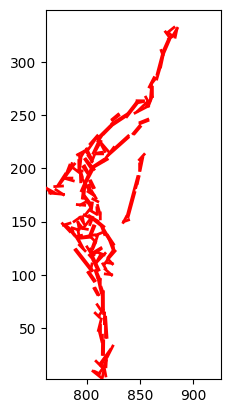

In [10]:
x_,y_   = np.where(ResultsDF.loc[0]['Mask'] != 0)
patch = ResultsDF.loc[0]['Patches'][0]
lsd   = cv2.createLineSegmentDetector(cv2.LSD_REFINE_ADV,2.5,0.001,0,90,-200,0.5,2048)
lines = cv2toski(lsd.detect((patch * 255).astype(np.uint8))[0])
x_,y_   = np.where((ResultsDF.loc[0]['Mask']*1) != 0)
lines = [((round(min(y_) + l[0][0],3),round(min(x_) + l[0][1],3)),(round(min(y_) + l[1][0],3),round(min(x_) + l[1][1],3))) for l in lines]

fig,ax = plt.subplots()
ax.imshow(np.zeros((1040, 1388)),cmap='gray',alpha=0)
for l in range(len(lines)):
        # Get line = [p0,p1]. 
        p0, p1 = lines[l]

        ax.plot((p0[0], p1[0]), (p0[1], p1[1]),linewidth=2,color='r',alpha=1,zorder=5)
        

ax.set_ylim([min(x_),max(x_)])
ax.set_xlim([min(y_),max(y_)])

In [12]:
help(pytlsd.lsd)

Help on built-in function lsd in module pytlsd:

lsd(...) method of builtins.PyCapsule instance
    lsd(img: numpy.ndarray, scale: float = 0.8, sigma_scale: float = 0.6, density_th: float = 0.0, gradnorm: numpy.ndarray = array([], dtype=float64), gradangle: numpy.ndarray = array([], dtype=float64), grad_nfa: bool = False) -> numpy.ndarray[numpy.float32]
    
    
    Computes Line Segment Detection (LSD) in the image.



In [25]:
pip list

Package                           Version
--------------------------------- -----------
absl-py                           1.4.0
alabaster                         0.7.13
altgraph                          0.17.3
anyio                             3.6.2
app-model                         0.1.1
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
asttokens                         2.2.1
astunparse                        1.6.3
asv                               0.5.1
attrs                             22.2.0
Babel                             2.11.0
backcall                          0.2.0
beautifulsoup4                    4.11.1
beniget                           0.4.1
bidict                            0.22.1
biosppy                           1.0.0
bleach                            6.0.0
build                             0.10.0
cachetools                        5.3.0
cachey                 

In [38]:
from skimage.transform import *

def peaks_to_lines(peaks, angles, dist):
    lines = []
    for _, angle, d in zip(peaks, angles, dist):
        (x1, y1) = d * np.cos(angle), d * np.sin(angle)
        (x2, y2) = x1*np.tan(angle + np.pi/2)*np.cos(angle), y1*np.tan(angle + np.pi/2)*np.sin(angle)
        lines.append(((x1, y1), (x2, y2)))
    return lines


%matplotlib qt
IDX = 1
x_,y_   = np.where(ResultsDF.loc[IDX]['Mask'] != 0)
patch = ResultsDF.loc[IDX]['Patches'][0]

# LSD
# lsd   = cv2.createLineSegmentDetector(cv2.LSD_REFINE_ADV,2.5,0.001,5,90,-200,0.5,2048)
# linhas, width, prec, nfa = lsd.detect((patch * 255).astype(np.uint8))
#lines = cv2toski(linhas)
#erros = [i for i, value in enumerate(nfa) if value < -10]

# PYTLSD
# lsd   = pytlsd.lsd(cv2.LSD_REFINE_ADV,2.5,0.001,0,90,-200,0.5,2048)
# lines = cv2toski(lsd.detect((patch * 255).astype(np.uint8))[0])

# HOUGH PROB
lines = probabilistic_hough_line(patch, threshold=0, line_length=3, theta=np.linspace(-np.pi/2,np.pi/2,360,endpoint=True),line_gap=1)
#lines = [((round(min(y_) + l[0][0],3),round(min(x_) + l[0][1],3)),(round(min(y_) + l[1][0],3),round(min(x_) + l[1][1],3))) for l in lines]

# HOUGH PROB
# hspace, angles_, dists_ = hough_line(patch)
# accum, angles, dists    = hough_line_peaks(hspace       = hspace, 
#                                            angles       = angles_,
#                                            dists        = dists_,
#                                            min_distance = 3,
#                                            min_angle    = 4,
#                                            threshold    = 0.3*np.max(hspace),
#                                            num_peaks    = ResultsDF.loc[1]['SKNW:Number of Branches'])
# lines = peaks_to_lines(accum, angles, dists)

# fig,ax = plt.subplots(figsize=(15,15))
# ax.imshow(1-patch,cmap='gray',alpha=1)
# for _, angle, dist in zip(*(accum,angles,dists)):
#     (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
#     ax.axline((x0, y0), slope=np.tan(angle + np.pi/2))

# HOUGH OPENCV
lines = cv2.HoughLinesP(image = (patch * 255).astype(np.uint8),
                   rho = 0.5,
                   theta = np.pi/180,
                   threshold = 10,
                   minLineLength = 2,
                   maxLineGap = 3)
lines = cv2toski(lines)


fig,ax = plt.subplots(figsize=(15,15))
ax.imshow(1-patch,cmap='gray',alpha=1)
for l in range(len(lines)):
        # Get line = [p0,p1]. 
        p0, p1 = lines[l]

        ax.plot((p0[0], p1[0]), (p0[1], p1[1]),linewidth=4,alpha=0.8,zorder=5)

#ax.set_ylim([min(x_),max(x_)])
#ax.set_xlim([min(y_),max(y_)])

In [20]:
len(angles)

19

In [106]:
help(cv2.createLineSegmentDetector)

Help on built-in function createLineSegmentDetector:

createLineSegmentDetector(...)
    createLineSegmentDetector([, refine[, scale[, sigma_scale[, quant[, ang_th[, log_eps[, density_th[, n_bins]]]]]]]]) -> retval
    .   @brief Creates a smart pointer to a LineSegmentDetector object and initializes it.
    .   
    .   The LineSegmentDetector algorithm is defined using the standard values. Only advanced users may want
    .   to edit those, as to tailor it for their own application.
    .   
    .   @param refine The way found lines will be refined, see #LineSegmentDetectorModes
    .   @param scale The scale of the image that will be used to find the lines. Range (0..1].
    .   @param sigma_scale Sigma for Gaussian filter. It is computed as sigma = sigma_scale/scale.
    .   @param quant Bound to the quantization error on the gradient norm.
    .   @param ang_th Gradient angle tolerance in degrees.
    .   @param log_eps Detection threshold: -log10(NFA) \> log_eps. Used only when a

In [79]:
help(lsd.detect)

Help on built-in function detect:

detect(...) method of cv2.LineSegmentDetector instance
    detect(image[, lines[, width[, prec[, nfa]]]]) -> lines, width, prec, nfa
    .   @brief Finds lines in the input image.
    .   
    .       This is the output of the default parameters of the algorithm on the above shown image.
    .   
    .       ![image](pics/building_lsd.png)
    .   
    .       @param image A grayscale (CV_8UC1) input image. If only a roi needs to be selected, use:
    .       `lsd_ptr-\>detect(image(roi), lines, ...); lines += Scalar(roi.x, roi.y, roi.x, roi.y);`
    .       @param lines A vector of Vec4f elements specifying the beginning and ending point of a line. Where
    .       Vec4f is (x1, y1, x2, y2), point 1 is the start, point 2 - end. Returned lines are strictly
    .       oriented depending on the gradient.
    .       @param width Vector of widths of the regions, where the lines are found. E.g. Width of line.
    .       @param prec Vector of precisions

In [152]:
import dis
dis.dis(lsd.detect)

TypeError: don't know how to disassemble builtin_function_or_method objects

In [ ]:
im = skel[50:320,150:400]

best_ang = -1
best_den = -1
best = 0
for ang_th in np.arange(50,100,10):
    for den in np.arange(0,0.8,0.1):
        lsd = cv2.createLineSegmentDetector(cv2.LSD_REFINE_ADV,2.5,0.001,0,ang_th,-200,den,2048)
        
        global prec
        prec = lsd.detect((im * 255).astype(np.uint8))[2]
        
        if np.mean(prec) > best:
            best_ang = ang_th
            best_den = den
            
best_lsd = cv2.createLineSegmentDetector(cv2.LSD_REFINE_ADV,2.5,0.001,0,best_ang,-200,best_den,2048)
lines = cv2toski(best_lsd.detect((im * 255).astype(np.uint8))[0])
prec = best_lsd.detect((im * 255).astype(np.uint8))[2]

%matplotlib qt
plt.figure(figsize=(10,10))
plt.imshow(im,cmap='gray')
ind = 0
for line in lines:
    p0, p1 = line
    cmap = pltc.cool
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]),linewidth=2,color=cmap(plt.Normalize(0, 1)(prec[ind])))
    ind = ind + 1
    plt.tight_layout()

plt.axis('off')
print('done')
plt.show()
        

In [ ]:
    #2nd option
    #lines = probabilistic_hough_line(patch, threshold=hough_params[0], line_length=int(hough_params[1]), line_gap=hough_params[2],theta = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=True),seed=100)
    
    # others
    #lines = probabilistic_hough_line(text_img[0], threshold=hough_params[0], line_length=hough_params[1], line_gap=hough_params[2], theta = np.linspace(-np.pi / 2, np.pi / 2, 720, endpoint=False))
    #lines = cv2toski(cv2.HoughLinesP(patch.astype(np.uint8), rho=1., theta=np.pi/180., threshold=hough_params[0], minLineLength=hough_params[1], maxLineGap=hough_params[2]))
    #lines = probabilistic_hough_line(patch, threshold=hough_params[0], line_length=hough_params[1], line_gap=hough_params[2], theta = np.linspace(-np.pi / 2, np.pi / 2, 720, endpoint=False))
    #lines = cv2toski(cv2.HoughLinesP((255*patch).astype(np.uint8), rho=150, theta=np.pi/180., threshold=2, minLineLength=1, maxLineGap=0))
    
    # LAST   SCALE = 2.5!!!! 1) 3.5 (radial) 2) losango 3
